In [1]:
import pandas as pd 
import numpy as np

#### Datensatz einlesen

Der folgende Datensatz enthält verschiedene Features zur Vorhersage, ob ein Patient an einer Herzerkrankung erkrankt ist  (target=0) oder gesunde ist (target=1).

In [2]:
df = pd.read_csv('09_heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Aufgabe 1

#### a) Analyse der Zielvariable

Untersuchen Sie die Verteilung der Zielvariablen 'target'.

In [20]:
#TODO
counts = df['target'].value_counts()
print("Verteliung 0: ")
print(100/(counts[0]+counts[1]) * counts[0])
print("Verteliung 1: ")
print(100/(counts[0]+counts[1]) * counts[1])

Verteliung 0: 
45.54455445544554
Verteliung 1: 
54.45544554455446


#### b)  Visualisierung der Altersverteilung

Zeichnen Sie ein Histogramm der Altersverteilung. Zeichnen Sie anschließend Histogramme der Altersverteilung derjenigen Patienten mit 'target=0' (herzkrank) und 'target=1' (gesund). Verwenden Sie dazu die Funktion <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html">matplotlib.pyplot.hist<a/>.

Text(0.5, 1.0, 'sick')

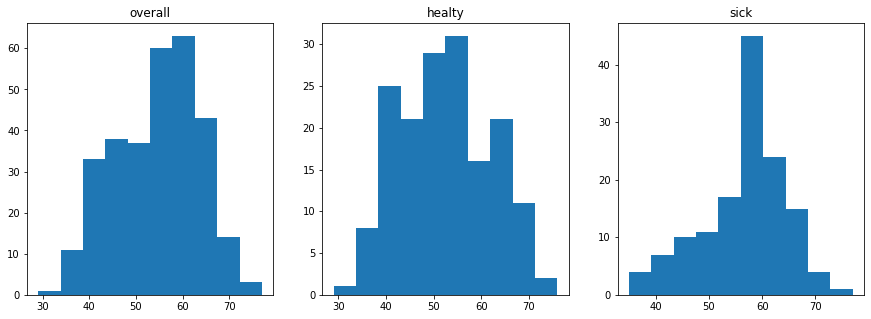

In [33]:
#TODO
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.hist(df['age'])  # density=False would make counts
ax1.set_title('overall')

df_healthy = df[df['target'] == 1]
df_sick = df[df['target'] == 0]

ax2.hist(df_healthy['age'])  # density=False would make counts
ax2.set_title('healty')

ax3.hist(df_sick['age'])  # density=False would make counts
ax3.set_title('sick')



#### c) Datenvorbereitung

Spalten Sie die Zielvariable **target** ab und splitten Sie die Daten anschließend in einen Trainings- und einen Testdatensatz auf (20% Test, 80% Train).

In [34]:
#TODO
from sklearn.model_selection import train_test_split

y = df['target']
X =  df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#### d) Training eines RandomForest

Trainieren Sie einen <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a> in Scikit-learn mit den Parametern **n_estimators=20**, **max_depth=1** und **min_samples_leaf = 2**. 

Hinweis: es wird in dieser Übung darauf verzichtet, die Hyperparameter zu optimieren. Grundsätzlich wäre dies jedoch sinnvoll.

In [35]:
#TODO
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=1, min_samples_leaf=2)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, min_samples_leaf=2, n_estimators=20)

#### e) Modellvalidierung

Bestimmen Sie jeweils den ROC-AUC-Score und die Accuracy auf dem Trainings- und auf dem Testdatensatz. Wie bewerten Sie die Güte des Modells?

In [39]:
#TODO
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(roc_auc)
print(acc)

0.840958605664488
0.8524590163934426


#### f) Feature-Importances

Bestimmen Sie die Feature-Importances für alle Features. Welche fünf Features haben die höchste Feature-Importance?



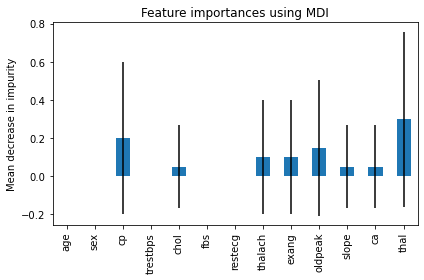

In [43]:
#TODO
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for clf in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<BarContainer object of 13 artists>

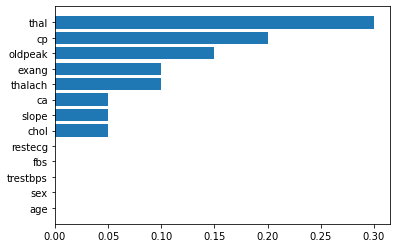

In [52]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])


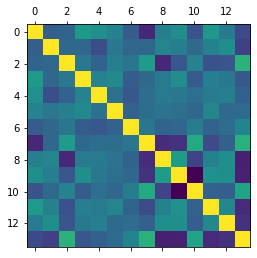

In [54]:
plt.matshow(df.corr())
plt.show()

#### g) Training eines Decision Trees

Trainieren Sie nun einen Decision Tree mit den Parametern **max_depth=1** und **min_samples_leaf = 2**. Berechnen Sie erneut die Accuracy und den ROC_AUC_SCORE jeweils für Train und Test. Vergleichen Sie die Ergebnisse mit den Ergebnissen des RandomForest.

In [ ]:
#TODO

## Aufgabe 2

In dieser Aufgabe soll für den obigen Datensatz ein Klassifikationsmodell basierend auf einem Support Vetor Classifier entwickelt werden.

#### a) Training eines Support Vector Classifiers

Trainieren Sie nun einen Support Vector Classifier in Scikit-learn unter Verwendung des Gauß-Kernels (kernel='rbf'). Bestimmen Sie anschließend die Accuracy auf dem Trainings- und auf dem Testdatensatz und vergleichen Sie diese mit den Ergebnissen des RandomForest. Wie erklären Sie Ihre Beobachtung?

In [ ]:
#TODO

#### b) SVC mit Standardisierung

Wiederholen Sie Teilaufgabe a), aber wenden Sie vorher einen StandardScaler an. Wie erklären Sie Ihre Beobachtung?

In [ ]:
#TODO

#### c) Hyperparameteroptimierung

Optimieren Sie nun die Hyperparameter C und gamma des Support Vector Classifiers. Legen Sie dazu eine Pipeline bestehend aus einem StandardScaler und einem Support Vector Classifier an und verwenden Sie diese innerhalb einer GridSearch mit fünffacher Cross Validation. Testen Sie für den Parameter C die Werte 0.01, 0.1, 1 und 10 und für den Parameter gamma die Werte 0.001, 0.01, 0.1, 1 und 10.

In [ ]:
#TODO

#### d) Modellbewertung

Vergleichen Sie das Modell, das sich aus den optimalen Parametern ergibt mit dem RandomForest, indem Sie wieder die Accuracy auf den Trainingsdaten und auf den Testdaten berechnen. Wie lautet Ihr Fazit?

In [ ]:
#TODO